<a href="https://colab.research.google.com/github/jek5on/MH/blob/main/%D0%BB%D0%B0%D0%B19_%D0%A1%D0%B2%D0%B0%D1%82%D0%B5%D0%BD%D0%BA%D0%BE_%D0%A4%D0%86%D0%A2_4_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Сватенко ФІТ 4-8**

**Лабораторна робота №9**

**Завдання**

1. Провести повний аналіз даних.

Датасет знаходиться за посиланням
https://www.google.com/url?q=https%3A%2F%2Fwww.kaggle.com%2Fdatasets%2Fprishasawhney%2Fmushroom-dataset.
Датасет містить інформацію про гриби.

Завантажити датасет.

Вивести перші 5 рядків.

Вивести розмір датасету, наявність пропущених даних, типи даних.

Вивести матрицю кореляції.

Вивевести кореляцію із цільовою функцією.

2. Побудувати дві моделі класифікації на вибір (наприклад, Випадковий ліс і логістичну регресію), підібрати параметри.
Оцінити моделі.
Вибрати найкращу. Вивести метрики, матрицю плутанини, класифікаційний звіт.
3. Методом ліктя і методом силуєтів визначити оптимальну кількість кластерів.
4. Зробити візуалізацію кількості кластерів двома методами на вибір, наприклад (K-means, DBSCAN).



Saving mushroom_cleaned.csv to mushroom_cleaned (3).csv
Перші 5 рядків датасету:
   cap-diameter  cap-shape  gill-attachment  gill-color  stem-height  \
0          1372          2                2          10     3.807467   
1          1461          2                2          10     3.807467   
2          1371          2                2          10     3.612496   
3          1261          6                2          10     3.787572   
4          1305          6                2          10     3.711971   

   stem-width  stem-color    season  class  
0        1545          11  1.804273      1  
1        1557          11  1.804273      1  
2        1566          11  1.804273      1  
3        1566          11  1.804273      1  
4        1464          11  0.943195      1  

Розмір датасету:
(54035, 9)

Наявність пропущених даних:
cap-diameter       0
cap-shape          0
gill-attachment    0
gill-color         0
stem-height        0
stem-width         0
stem-color         0
season     

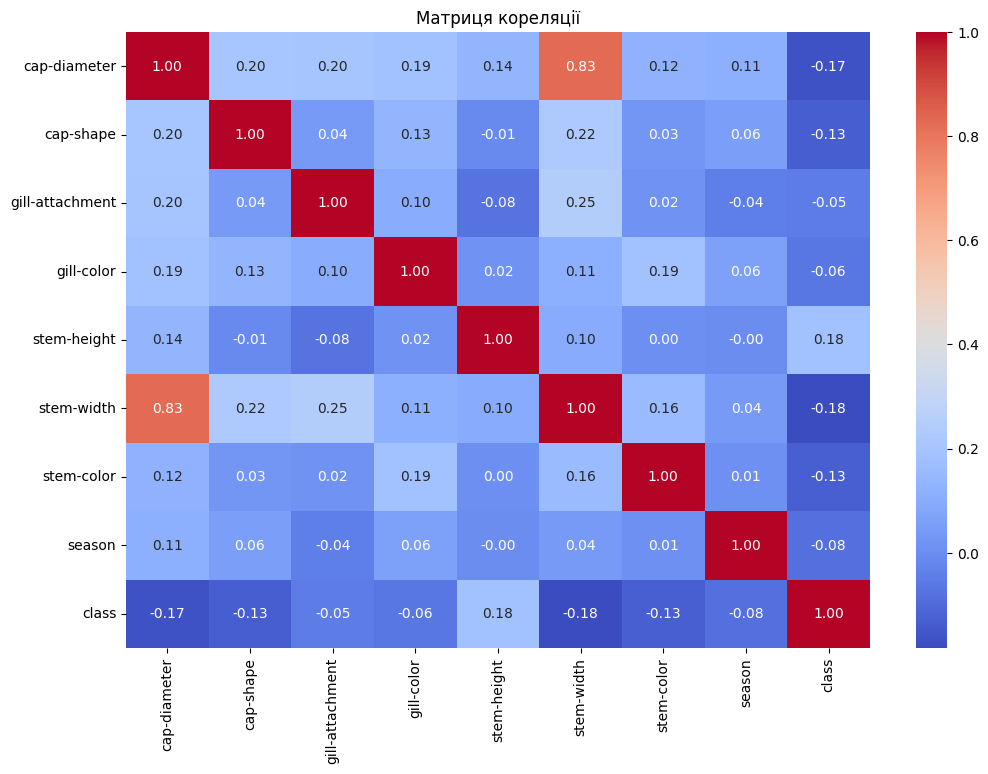


Кореляція з цільовою функцією:
class              1.000000
stem-height        0.183354
gill-attachment   -0.052541
gill-color        -0.063947
season            -0.082919
stem-color        -0.128339
cap-shape         -0.133338
cap-diameter      -0.165676
stem-width        -0.182856
Name: class, dtype: float64

Найкращі параметри для Випадкового лісу: {'max_depth': None, 'n_estimators': 50}
Точність Випадкового лісу: 0.9906542056074766
Матриця плутанини для Випадкового лісу:
 [[4860   49]
 [  52 5846]]
Класифікаційний звіт для Випадкового лісу:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4909
           1       0.99      0.99      0.99      5898

    accuracy                           0.99     10807
   macro avg       0.99      0.99      0.99     10807
weighted avg       0.99      0.99      0.99     10807


Найкращі параметри для Логістичної регресії: {'C': 0.1}
Точність Логістичної регресії: 0.6364393448690664
Матриця плутан

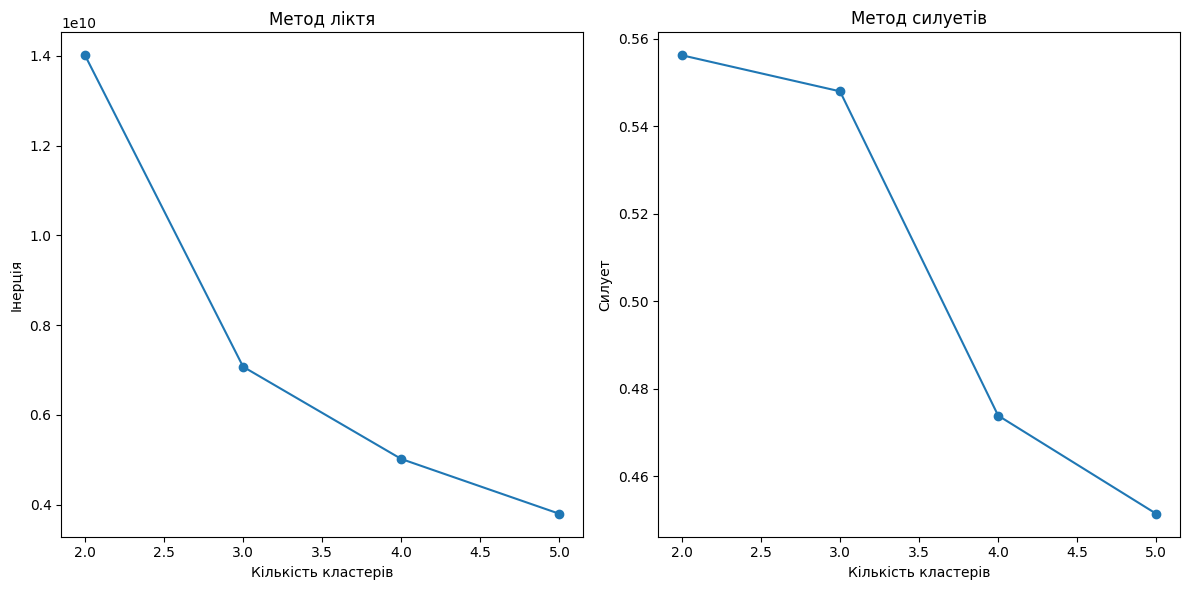

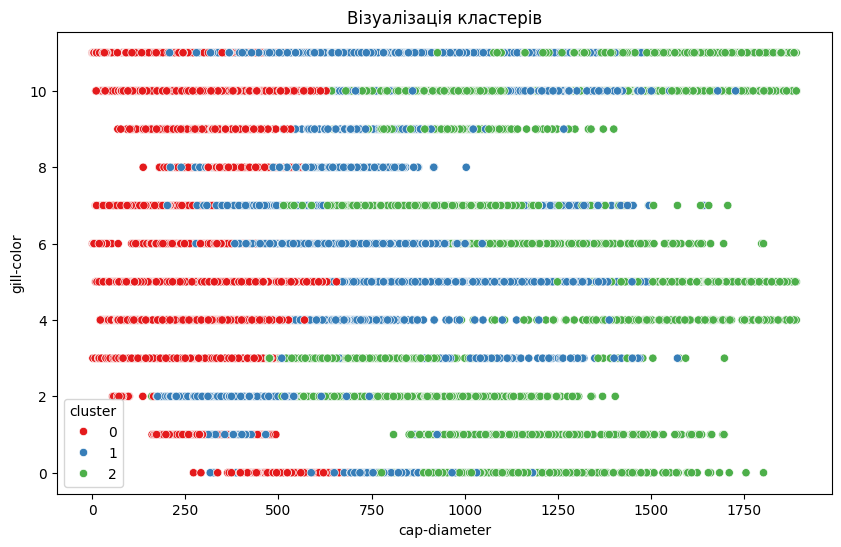

In [5]:
!pip install pandas seaborn matplotlib scikit-learn

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from google.colab import files

uploaded = files.upload()
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

print("Перші 5 рядків датасету:")
print(df.head())

print("\nРозмір датасету:")
print(df.shape)

print("\nНаявність пропущених даних:")
print(df.isnull().sum())

print("\nТипи даних:")
print(df.dtypes)

correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Матриця кореляції")
plt.show()

target_correlation = df.corr()['class'].sort_values(ascending=False)
print("\nКореляція з цільовою функцією:")
print(target_correlation)

label_encoder = LabelEncoder()
df['class'] = label_encoder.fit_transform(df['class'])

X = df.drop('class', axis=1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier()
rf_params = {'n_estimators': [50], 'max_depth': [None, 10]}
rf_grid = GridSearchCV(rf_model, rf_params, cv=5, n_jobs=-1)
rf_grid.fit(X_train, y_train)

lr_model = LogisticRegression(max_iter=1000)
lr_params = {'C': [0.1, 1]}
lr_grid = GridSearchCV(lr_model, lr_params, cv=5, n_jobs=-1)
lr_grid.fit(X_train, y_train)

print("\nНайкращі параметри для Випадкового лісу:", rf_grid.best_params_)
rf_pred = rf_grid.predict(X_test)
print("Точність Випадкового лісу:", accuracy_score(y_test, rf_pred))
print("Матриця плутанини для Випадкового лісу:\n", confusion_matrix(y_test, rf_pred))
print("Класифікаційний звіт для Випадкового лісу:\n", classification_report(y_test, rf_pred))

print("\nНайкращі параметри для Логістичної регресії:", lr_grid.best_params_)
lr_pred = lr_grid.predict(X_test)
print("Точність Логістичної регресії:", accuracy_score(y_test, lr_pred))
print("Матриця плутанини для Логістичної регресії:\n", confusion_matrix(y_test, lr_pred))
print("Класифікаційний звіт для Логістичної регресії:\n", classification_report(y_test, lr_pred))

if accuracy_score(y_test, rf_pred) > accuracy_score(y_test, lr_pred):
    print("\nНайкраща модель: Випадковий ліс")
else:
    print("\nНайкраща модель: Логістична регресія")


inertia = []
silhouette_scores = []

for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(2, 6), inertia, marker='o')
plt.title('Метод ліктя')
plt.xlabel('Кількість кластерів')
plt.ylabel('Інерція')

plt.subplot(1, 2, 2)
plt.plot(range(2, 6), silhouette_scores, marker='o')
plt.title('Метод силуетів')
plt.xlabel('Кількість кластерів')
plt.ylabel('Силует')

plt.tight_layout()
plt.show()

optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(X)

df['cluster'] = clusters

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='cap-diameter', y='gill-color', hue='cluster', palette='Set1')
plt.title('Візуалізація кластерів')
plt.show()




**Висновок:**


У цьому завданні було проведено всебічний аналіз даних на основі датасету про гриби. Спочатку були завантажені дані, перевірено їхній розмір, наявність пропущених значень та типи даних. Виконано візуалізацію матриці кореляції, що дозволила виявити зв’язки між змінними, включаючи кореляцію з цільовою змінною.

Далі було побудовано дві моделі класифікації: Випадковий ліс та Логістична регресія. Обидві моделі пройшли крос-валідацію для підбору оптимальних параметрів. Найкраща модель була обрана на основі точності, де результати показали, що Випадковий ліс має вищу точність у порівнянні з Логістичною регресією.

На завершення, методом ліктя та методом силуетів була визначена оптимальна кількість кластерів, що дозволило візуалізувати класифікацію даних у просторі `cap-diameter` та `gill-color`. Отримані результати свідчать про успішність застосованих алгоритмів для класифікації та кластеризації даних.